In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from taz_scripts import preprocess
import math
# plt.style.use("ggplot")

In [2]:
clean_green_buildings_2015 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2015.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2020 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2020.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2025 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2025.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2030 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2030.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2035 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2035.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2040 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2040.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2045 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2045.csv").rename(columns={"zone_id": "taz"})
clean_green_buildings_2050 = pd.read_csv("s3://susa-mtc/UrbanSim/Clean and Green/run5_buildings_2050.csv").rename(columns={"zone_id": "taz"})
print("Clean Green Finished Loading")


# rising_tides_buildings_2015 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2015.csv").rename(columns={"zone_id": "taz"})

#problematic
# rising_tides_buildings_2020 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2020.csv").rename(columns={"zone_id": "taz"})

# rising_tides_buildings_2025 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2025.csv").rename(columns={"zone_id": "taz"})
# rising_tides_buildings_2030 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2030.csv").rename(columns={"zone_id": "taz"})

#problematic
# rising_tides_buildings_2035 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2035.csv").rename(columns={"zone_id": "taz"})

# rising_tides_buildings_2040 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2040.csv").rename(columns={"zone_id": "taz"})

#problematic
# rising_tides_buildings_2045 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2045.csv").rename(columns={"zone_id": "taz"})
# rising_tides_buildings_2050 = pd.read_csv("s3://susa-mtc/UrbanSim/Rising Tides Falling Fortunes/run29_buildings_2050.csv").rename(columns={"zone_id": "taz"})
# print("Rising Tides Finished Loading")

preprocess(clean_green_buildings_2015)
preprocess(clean_green_buildings_2020)
preprocess(clean_green_buildings_2025)
preprocess(clean_green_buildings_2030)
preprocess(clean_green_buildings_2035)
preprocess(clean_green_buildings_2040)
preprocess(clean_green_buildings_2045)
preprocess(clean_green_buildings_2050)
print("Finished Preprocessing Clean and Green")

# preprocess(rising_tides_buildings_2015)
# preprocess(rising_tides_buildings_2020)
# preprocess(rising_tides_buildings_2025)
# preprocess(rising_tides_buildings_2030)
# preprocess(rising_tides_buildings_2035)
# preprocess(rising_tides_buildings_2040)
# preprocess(rising_tides_buildings_2045)
# preprocess(rising_tides_buildings_2050)
# print("Finished Preprocessing Rising Tides")


/home/ec2-user/horizon/.env/lib64/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clean Green Finished Loading
Finished Preprocessing Clean and Green


# Three ways we are measuring change
 - Counts
     - reflects both the amount of increase/decrease in building development, and transit lines
 - Percentage Change
     - looks at within the number of existing buildings, how they are served by public transportation
 - TVD
     - looks at changes in distribution between years 

In [3]:
#TVD over time

In [4]:
yrs = ["2015", "2020", "2025", "2030", "2035", "2040", "2045", "2050"]
    
def counts_over_time():
    frame = pd.DataFrame(columns={"year", "building_id", "county_name", "transit_type"})
    yr_count = 0
    for i in [clean_green_buildings_2015, clean_green_buildings_2020, clean_green_buildings_2025, 
              clean_green_buildings_2030, clean_green_buildings_2035, clean_green_buildings_2040, 
             clean_green_buildings_2045, clean_green_buildings_2050]:
        temp = i.groupby(["county_name", "transit_type"]).count().fillna(0).reset_index()[["county_name", "transit_type", "building_id"]]
        temp["year"] = np.repeat(yrs[yr_count], temp.shape[0])
        frame = frame.append(temp)
        yr_count += 1
    return frame

In [5]:
by_counts = counts_over_time()

/home/ec2-user/horizon/.env/lib64/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
by_counts = by_counts.rename(columns={"building_id": "counts"})

# Taking a look at patterns across the bay over time

In [7]:
transit_across_bay = by_counts.groupby(["transit_type", "year"]).sum().reset_index()
transit_across_bay.head()


,transit_type,year,counts
0,b1,2015,70659.0
1,b1,2020,70660.0
2,b1,2025,70660.0
3,b1,2030,70668.0
4,b1,2035,67017.0


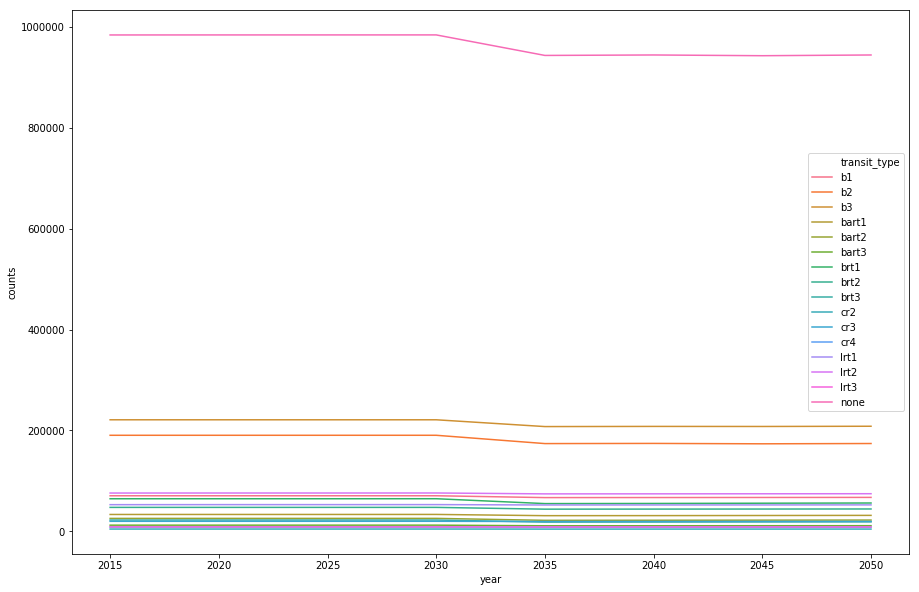

In [10]:
plt.figure(figsize= (15, 10))
sns.lineplot(x = "year", y= "counts", data = transit_across_bay, hue = "transit_type")
plt.savefig(fname = "all_transit_count", dpi=512)

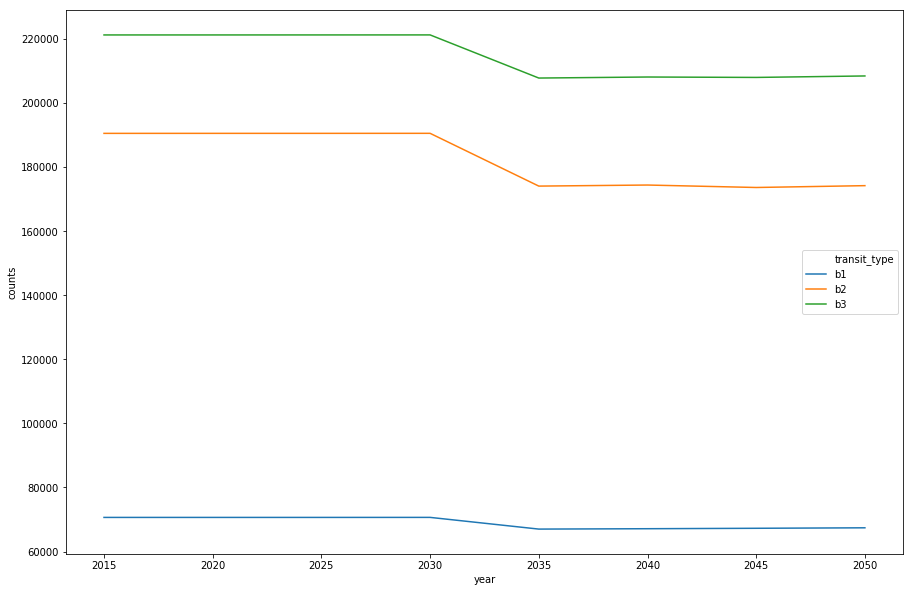

In [11]:
#buses
plt.figure(figsize= (15, 10))
buses = ["b1", "b2", "b3"]
sns.lineplot(x = "year", y= "counts", data = transit_across_bay[transit_across_bay["transit_type"].isin(buses)], hue = "transit_type")
plt.savefig(fname = "bus_transit", dpi=512)

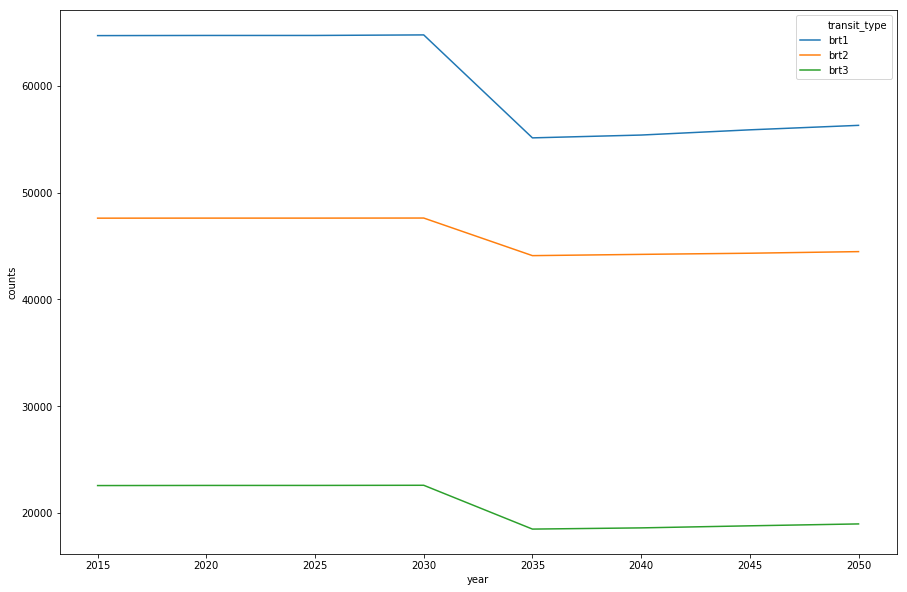

In [12]:
#bus rapid transit
#buses
plt.figure(figsize= (15, 10))
brt = ["brt1", "brt2", "brt3"]
sns.lineplot(x = "year", y= "counts", data = transit_across_bay[transit_across_bay["transit_type"].isin(brt)], hue = "transit_type")
plt.savefig(fname = "brt", dpi=512)

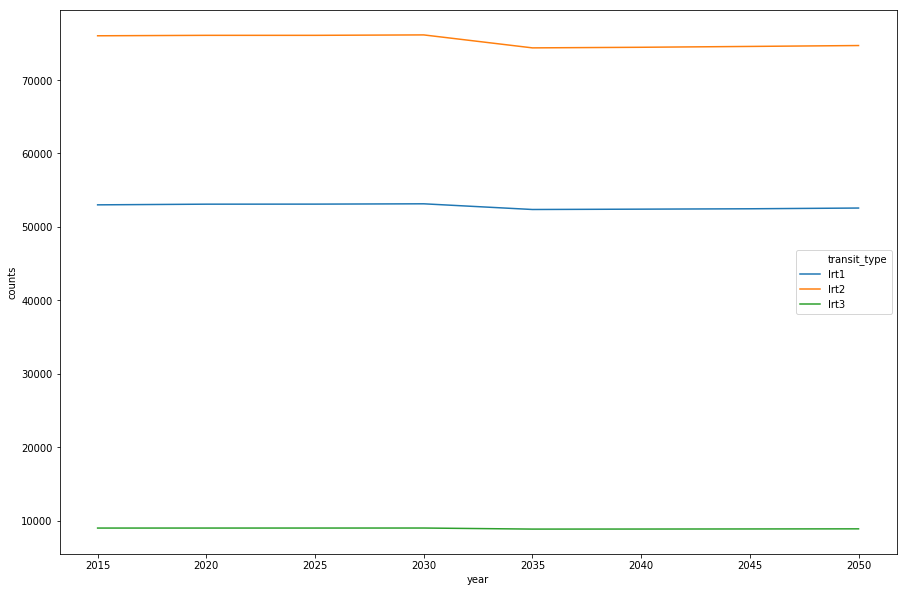

In [13]:
#light rail
#buses
plt.figure(figsize= (15, 10))
lrt = ["lrt1", "lrt2", "lrt3"]
sns.lineplot(x = "year", y= "counts", data = transit_across_bay[transit_across_bay["transit_type"].isin(lrt)], hue = "transit_type")
plt.savefig(fname = "lrt", dpi=512)


Why don't we see as massive of a drop?

- is it because LRT is concentrated mostly in the south bay?

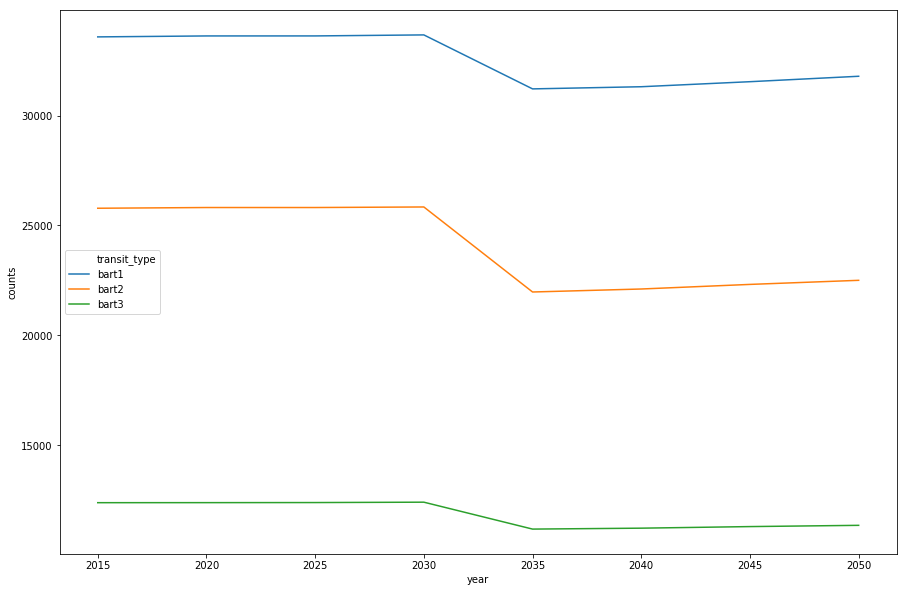

In [14]:
# bart
#buses
plt.figure(figsize= (15, 10))
bart = ["bart1", "bart2", "bart3"]
sns.lineplot(x = "year", y= "counts", data = transit_across_bay[transit_across_bay["transit_type"].isin(bart)], hue = "transit_type")
plt.savefig(fname = "bart", dpi=512)

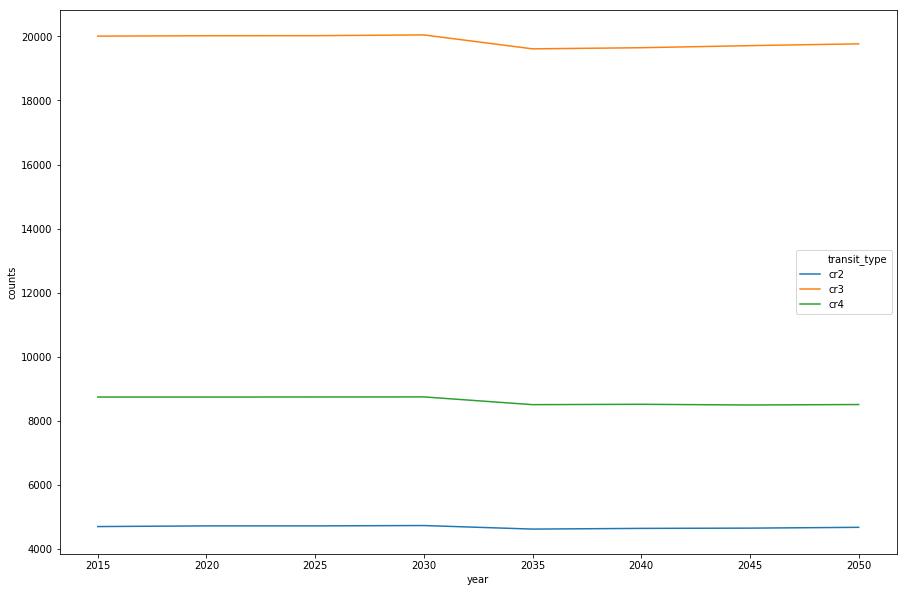

In [15]:
# Commuter rail
#buses
plt.figure(figsize= (15, 10))
cr = ["cr2", "cr3", "cr4"]
sns.lineplot(x = "year", y= "counts", data = transit_across_bay[transit_across_bay["transit_type"].isin(cr)], hue = "transit_type")
plt.savefig(fname = "cr", dpi=512)


Perhaps due to some sort of collapse for capital corridor, but not caltrain because that's south bay

# Looking at counts across counties

In [18]:
county_counts = by_counts.groupby(["county_name", "year"]).sum().reset_index()
county_counts.head()

,county_name,year,counts
0,Alameda,2015,372170.0
1,Alameda,2020,372233.0
2,Alameda,2025,372241.0
3,Alameda,2030,372344.0
4,Alameda,2035,305455.0


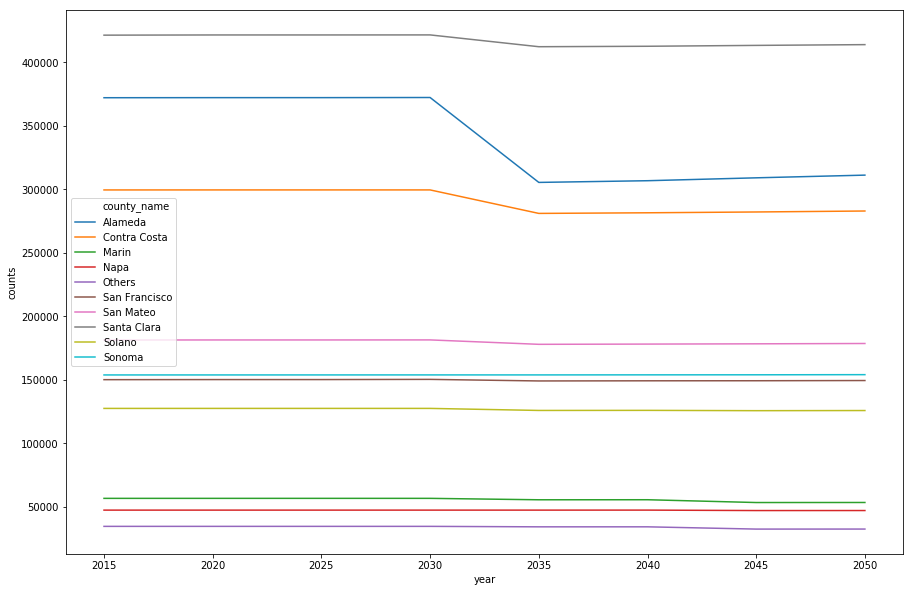

In [19]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = "year", y="counts", data = county_counts, hue = "county_name")
plt.savefig(fname = "by_county", dpi=512)

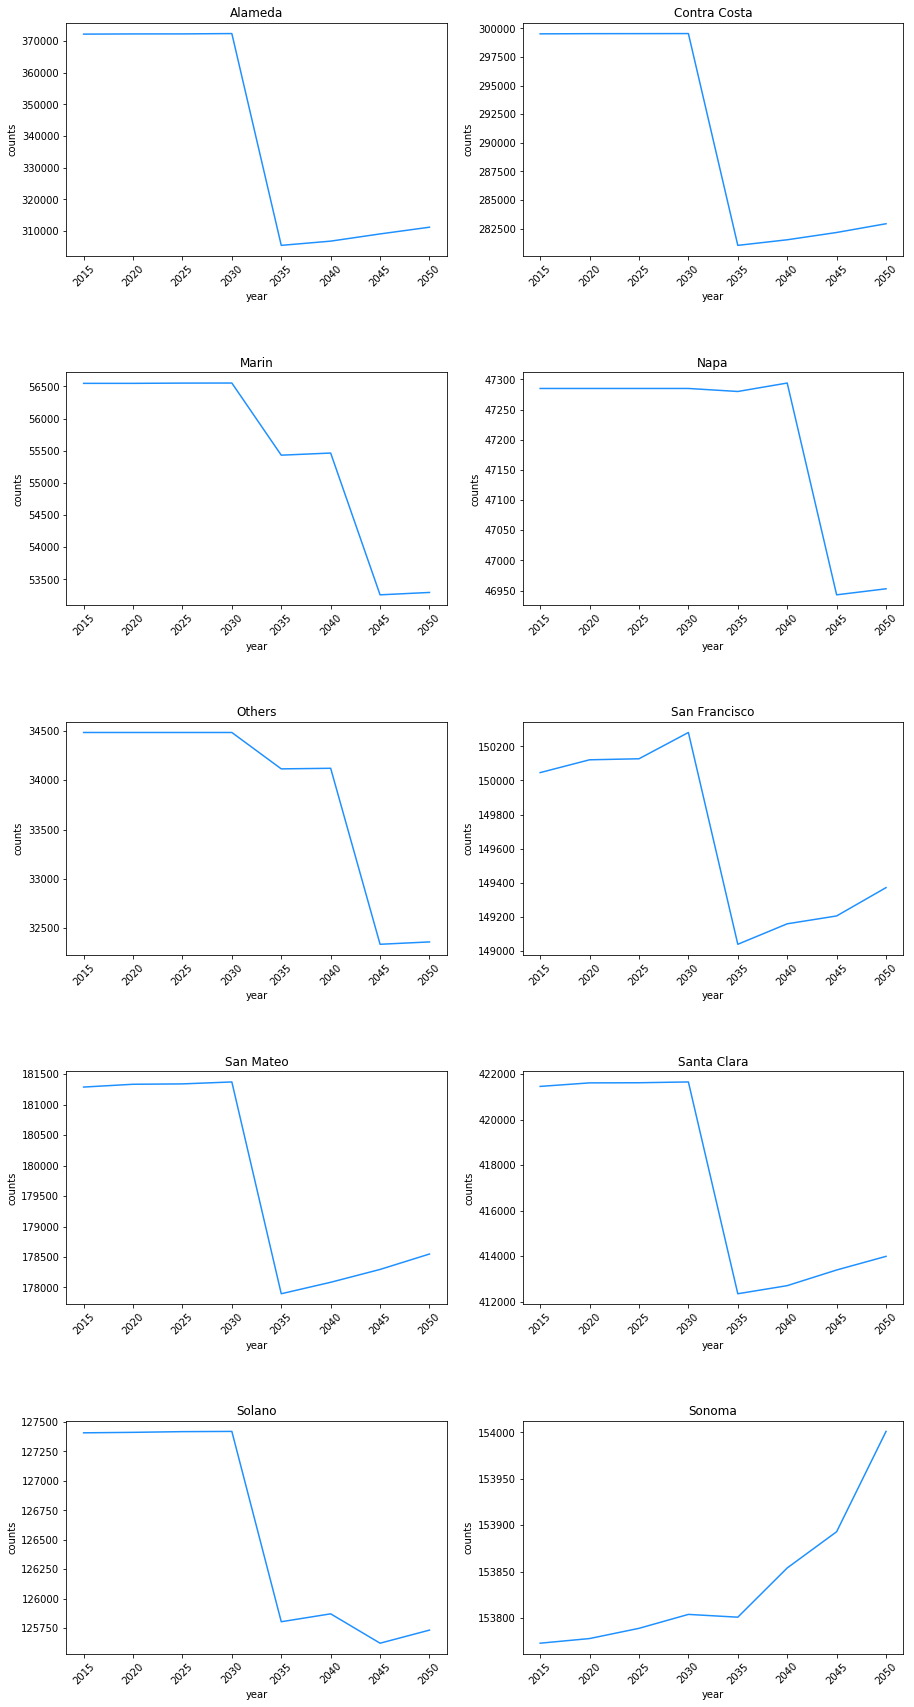

In [20]:
#split by subregion
plt.subplots(5, 2, figsize=(15,30));
plt.subplots_adjust(hspace=0.5)
counties = county_counts["county_name"].unique()
for i in np.arange(0, 10):
    ax1 = plt.subplot(5, 2, i+ 1)
    sns.lineplot(x="year", y = "counts", data = county_counts[county_counts["county_name"] == counties[i]], ax=ax1, color = "dodgerblue")
    ax1.set_title(counties[i])
    plt.xticks(rotation=45)

plt.savefig(fname = "all_counties", dpi=512)


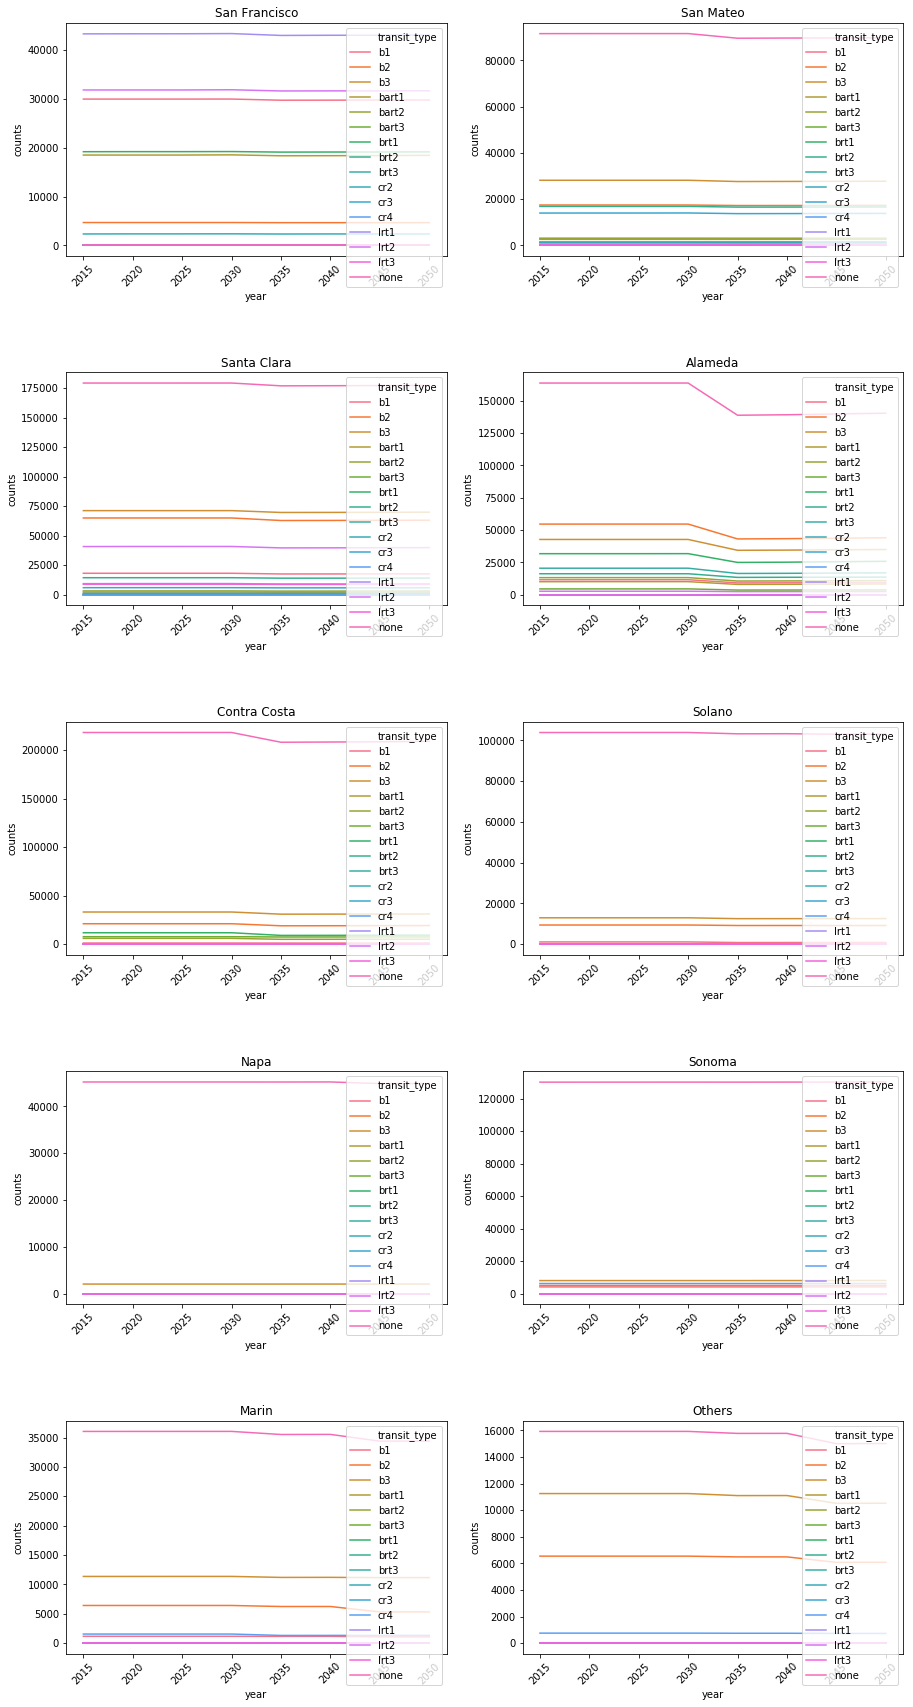

In [21]:
plt.subplots(5, 2, figsize=(15,30));
plt.subplots_adjust(hspace=0.5)
counties = by_counts["county_name"].unique()
# transits = by_counts["transit_type"].unique()
for i in np.arange(0, 10):
    ax1 = plt.subplot(5, 2, i+ 1)
    sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[i]], ax=ax1, color = "dodgerblue", hue="transit_type")
    ax1.set_title(counties[i])
    plt.xticks(rotation=45)
plt.savefig(fname = "split_counties", dpi=512)

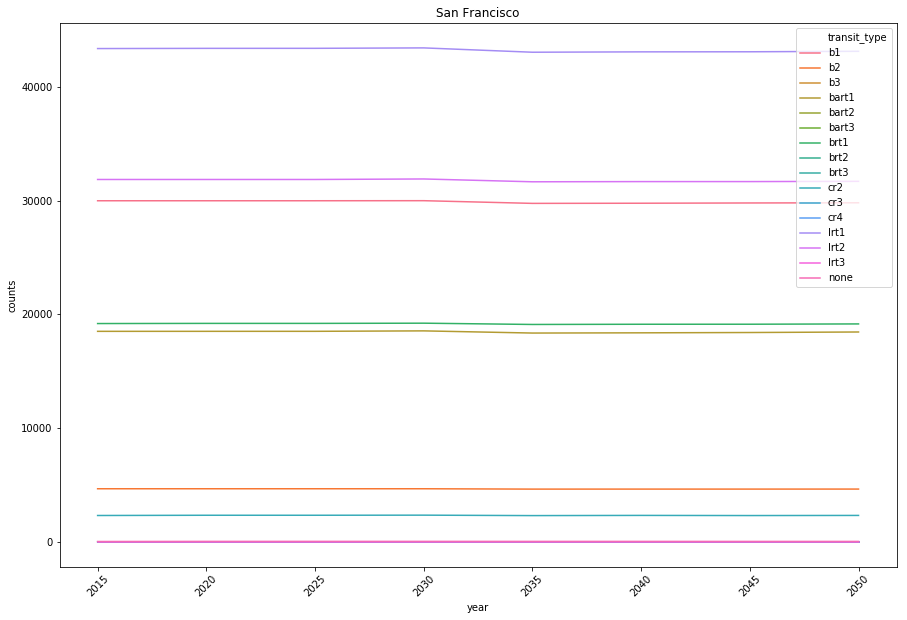

In [22]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[0]], color = "dodgerblue", hue="transit_type")
plt.title(counties[0])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')
plt.savefig(fname = "sf_all", dpi=512)


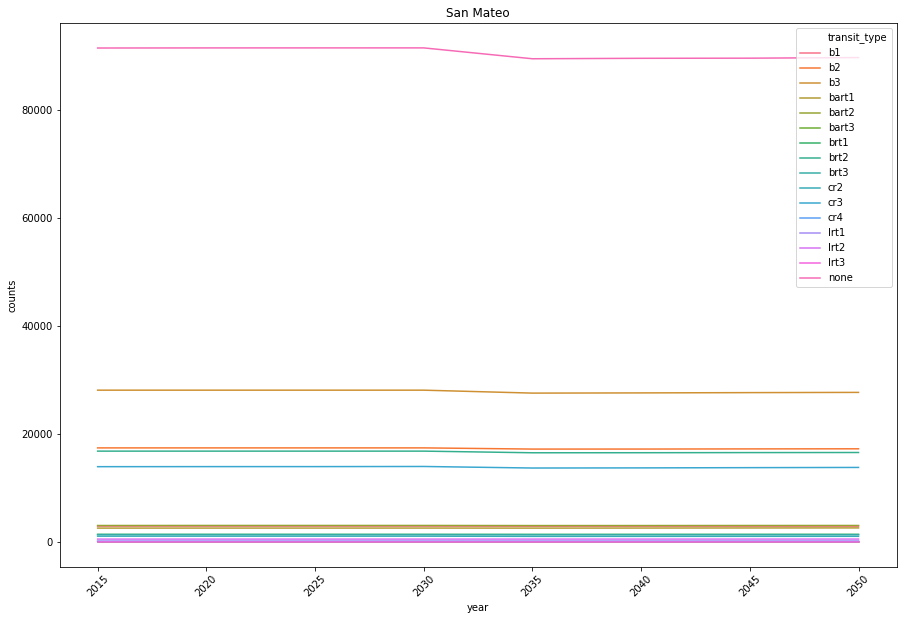

In [23]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[1]], color = "dodgerblue", hue="transit_type")
plt.title(counties[1])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "san_mateo_all", dpi=512)

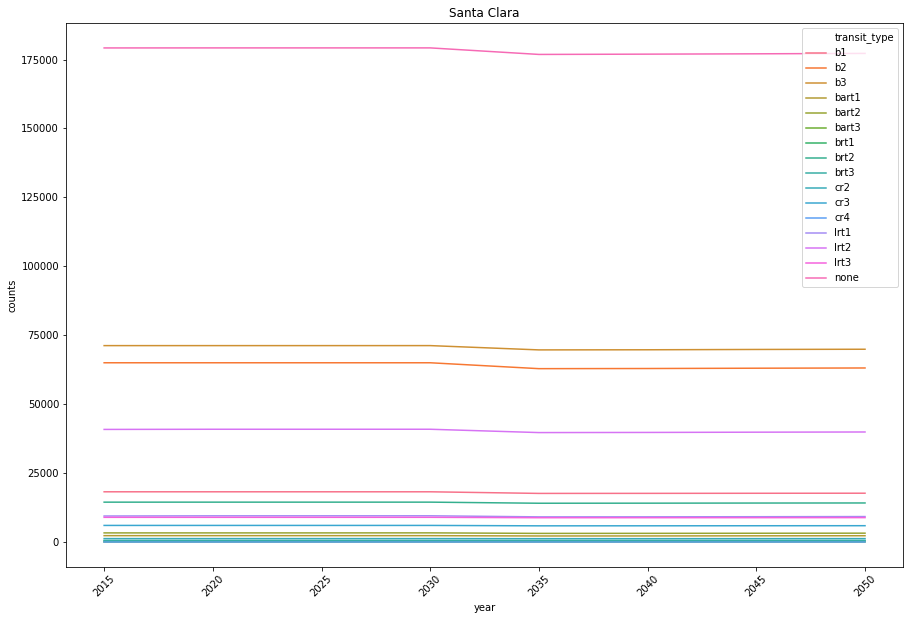

In [24]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[2]], color = "dodgerblue", hue="transit_type")
plt.title(counties[2])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "santa_clara_all", dpi=512)

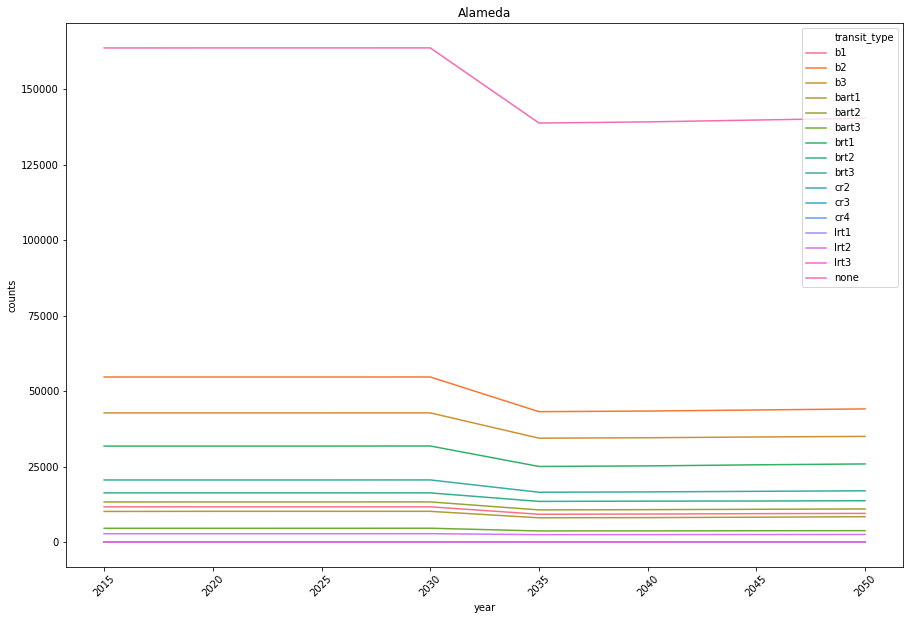

In [25]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[3]], color = "dodgerblue", hue="transit_type")
plt.title(counties[3])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "alameda_all", dpi=512)

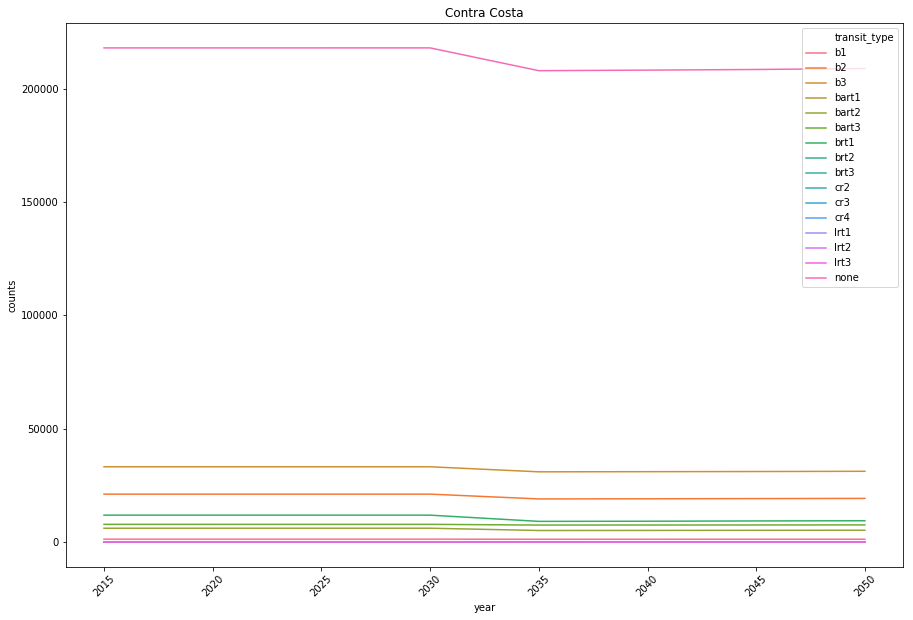

In [26]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[4]], color = "dodgerblue", hue="transit_type")
plt.title(counties[4])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "contra_costa_all", dpi=512)

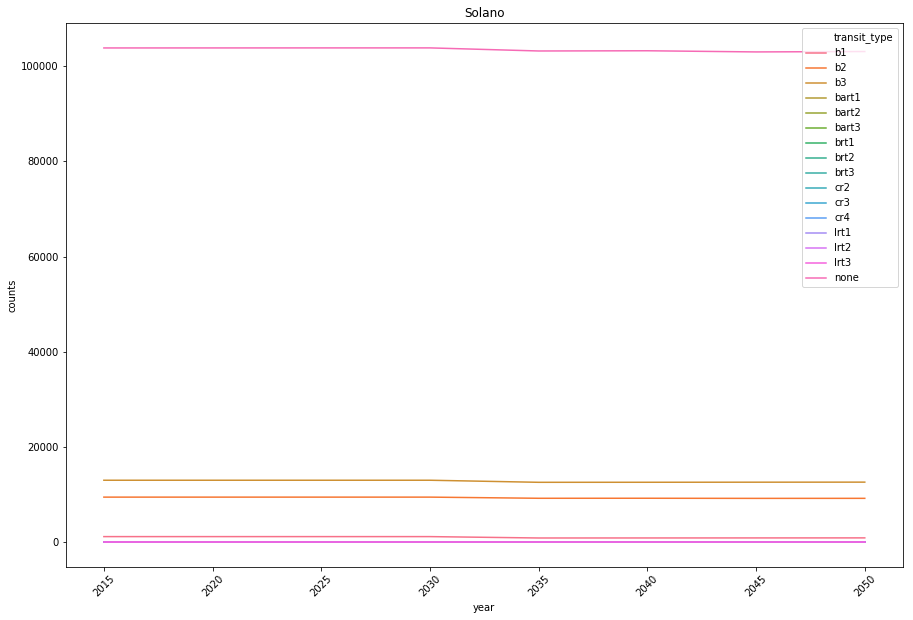

In [27]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[5]], color = "dodgerblue", hue="transit_type")
plt.title(counties[5])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "solano_all", dpi=512)



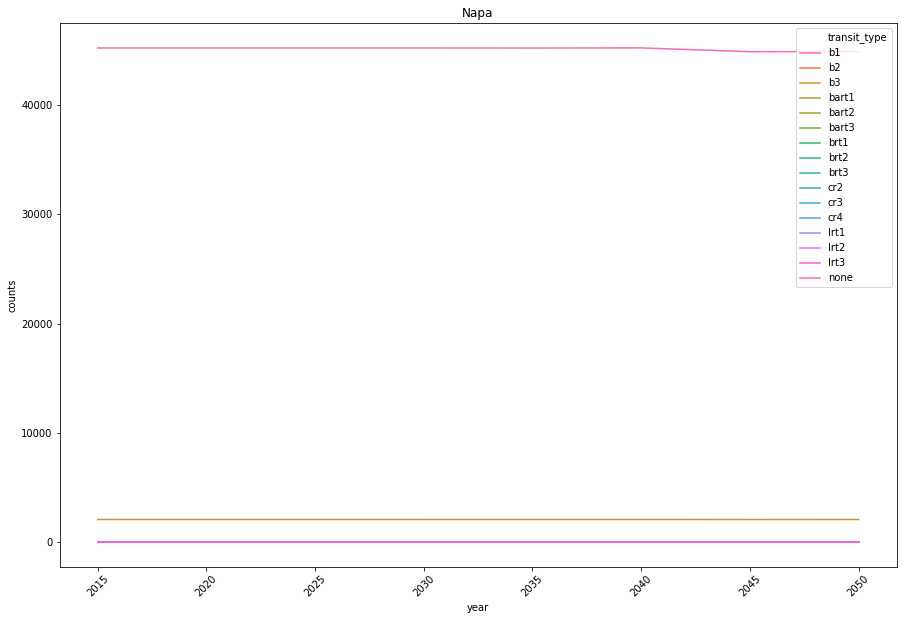

In [28]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[6]], color = "dodgerblue", hue="transit_type")
plt.title(counties[6])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "napa_all", dpi=512)

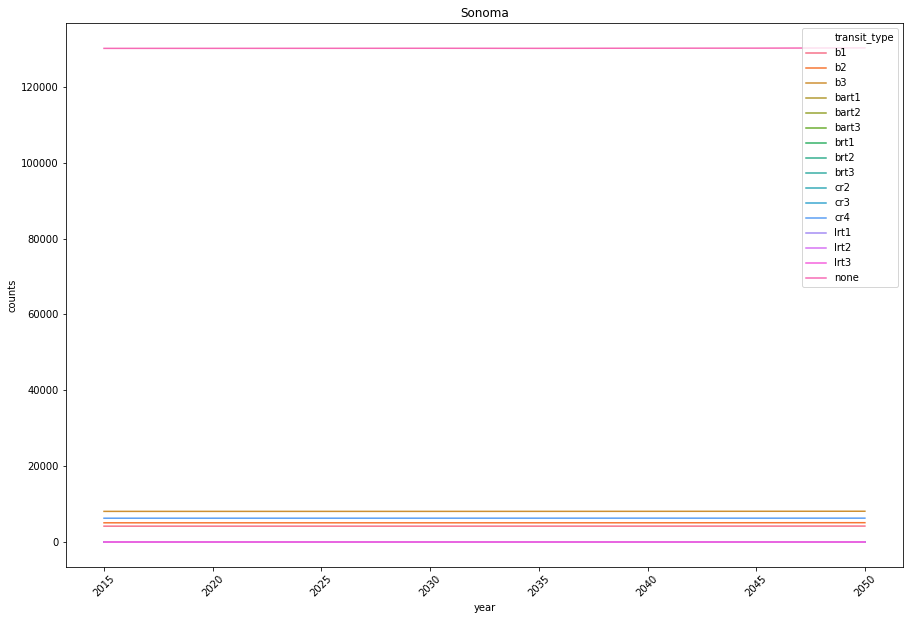

In [29]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[7]], color = "dodgerblue", hue="transit_type")
plt.title(counties[7])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "sonoma_all", dpi=512)

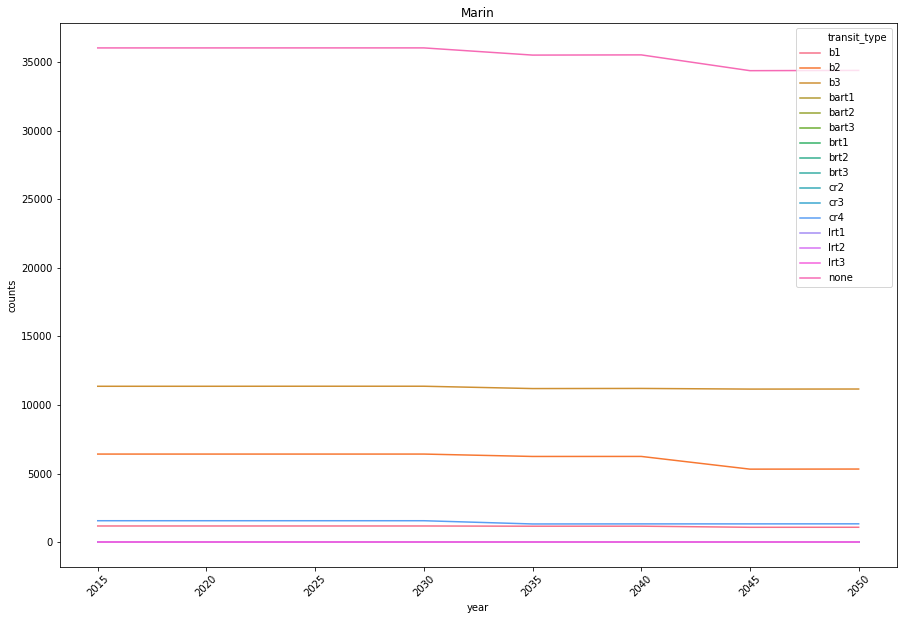

In [30]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[8]], color = "dodgerblue", hue="transit_type")
plt.title(counties[8])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "marina_all", dpi=512)

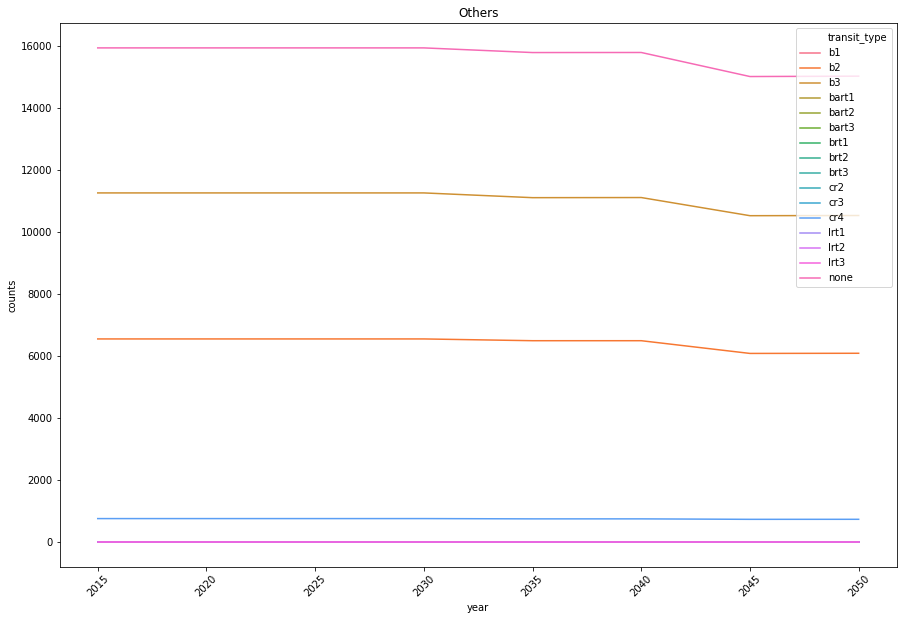

In [31]:
plt.figure(figsize=(15,10));

sns.lineplot(x="year", y = "counts", data = by_counts[by_counts["county_name"] == counties[9]], color = "dodgerblue", hue="transit_type")
plt.title(counties[9])
plt.xticks(rotation=45)
plt.legend(loc = 'upper right')

plt.savefig(fname = "others_all", dpi=512)

In [124]:
#table of perentage change between 2030 and 2035 by county

#in general
grouped_counts = by_counts.groupby(["county_name", "year"]).sum().reset_index()
grouped_counts[grouped_counts["year"] == "2030"]["counts"] 

#NaN error
# - grouped_counts[grouped_counts["year"] == "2035"]["counts"]

3    NaN
4    NaN
11   NaN
12   NaN
19   NaN
20   NaN
27   NaN
28   NaN
35   NaN
36   NaN
43   NaN
44   NaN
51   NaN
52   NaN
59   NaN
60   NaN
67   NaN
68   NaN
75   NaN
76   NaN
Name: counts, dtype: float64

In [134]:
differences_30_35 = pd.DataFrame()
differences_30_35["county"] = grouped_counts["county_name"].unique()
diffs = np.array(grouped_counts[grouped_counts["year"] == "2030"]["counts"])- np.array(grouped_counts[grouped_counts["year"] == "2035"]["counts"])
differences_30_35["differences"] = diffs

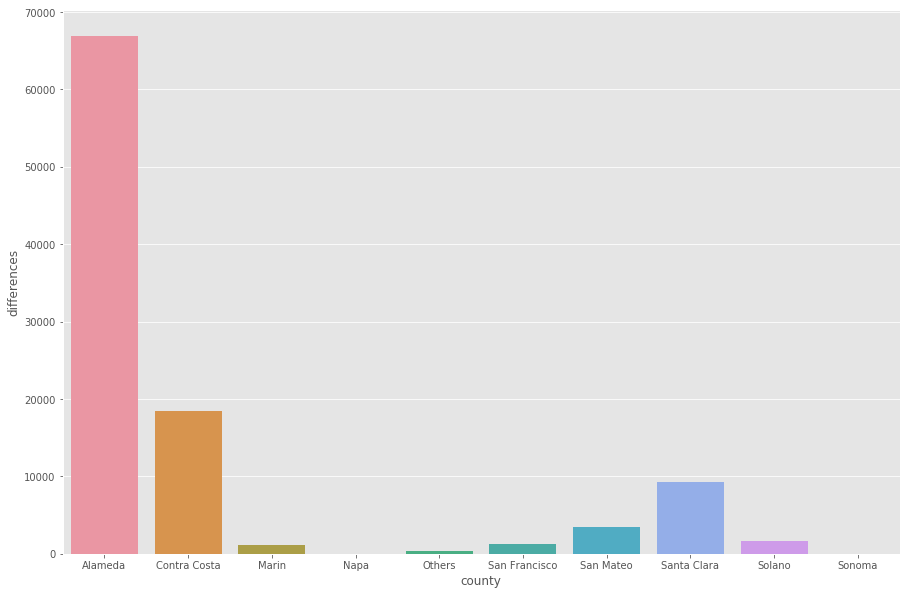

In [138]:
plt.figure(figsize=(15, 10))
sns.barplot(x= "county", y="differences", data = differences_30_35)
plt.savefig(fname = "f", dpi=512)

# percentages would tell us what percent of existing buildings are serviced by which method of public transportation


In [ ]:
yrs = ["2015", "2020", "2025", "2030", "2035", "2040", "2045", "2050"]
    
    #unfinished
def percentages_over_timer():
    frame = pd.DataFrame(columns={"year", "building_id", "county_name", "transit_type"})
    yr_count = 0
    for i in [clean_green_buildings_2015, clean_green_buildings_2020, clean_green_buildings_2025, 
              clean_green_buildings_2030, clean_green_buildings_2035, clean_green_buildings_2040, 
             clean_green_buildings_2045, clean_green_buildings_2050]:
        temp = i.groupby(["county_name", "transit_type"]).count().fillna(0).reset_index()[["county_name", "transit_type", "building_id"]]
        temp["year"] = np.repeat(yrs[yr_count], temp.shape[0])
        frame = frame.append(temp)
        yr_count += 1
    return frame